## TP 2 Intégration temporelle

**Objectif du TP**

L’objectif de ce TP est d’étudier numériquement le comportement des schémas discrets issus de l’application de trois schémas d’intégration temporelle classiques (Euler explicite, RK2, Euler implicite) sur des schémas semi-discrets
d´ecentrés d’ordre $1$ (FOU) et $2$ (UPO2VF) en espace.

- Rappel du schéma semi-discret FOU :
$$
\frac{du}{dt} = -\frac{a}{\Delta x}(u_{i} - u_{i-1})
$$

- Rappel du schéma semi-discret UPO2VF :
$$
\frac{du}{dt} = -\frac{a}{4\Delta x}(u_{i+1} + 3 u_{i} - 5 u_{i-1} + u_{i-2})
$$

Pour ce TP, on utilisera la condition initiale ”créneau” définie dans le TP 1 et on observera la solution au terme d’un temps permettant à la solution de revenir à sa position initiale.

In [137]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [138]:
# Paramètres
L = 1.0   # Longueur du domaine
m = 50    # Nombre de points de discrétisation
x0 = 0.5  # Position de la discontinuité pour la condition initiale
a = 1.0   # Vitesse de convection
T = L / a # Temps final

def condition_init(x, x0):
    return np.where(x < x0, 0, 1)

In [139]:
def discretisation_FOU(u, dx, a):
    du_dt = -a / (dx) * (u - np.roll(u, 1))
    return du_dt

def discretisation_UPO2VF(u, dx, a):
    du_dt = -a / (4 * dx) * (np.roll(u, -1) + 3 * u - 5 * np.roll(u, 1) + np.roll(u, 2))
    return du_dt

In [140]:
def affichage_discretisation(CFL_list, integration_method):
    plt.figure(figsize=(4*len(CFL_list), 3))

    # Boucle sur les différentes CFLs
    for i, CFL in enumerate(CFL_list):
        dx = L / m  # Pas d'espace
        dt = CFL * dx  # Pas de temps en fonction de la CFL

        # Initialisation de la condition initiale
        x = np.linspace(0, L, m)
        u_fou = condition_init(x, x0)
        u_upo2vf = condition_init(x, x0)

        # Boucle temporelle
        for n in range(int(T / dt) - 1):

            # Discrétisation FOU
            u_fou = integration_method(u_fou, dt, discretisation_FOU, dx, a)

            # Discrétisation UPO2VF
            u_upo2vf = integration_method(u_upo2vf, dt, discretisation_UPO2VF, dx, a)
            
        # Affichage des résultats
        plt.subplot(1, len(CFL_list), i + 1)

        plt.title(f"CFL = {CFL}")

        plt.plot(x, condition_init(x, x0), label="Condition initiale")
        plt.plot(x, u_fou, label="FOU")
        plt.plot(x, u_upo2vf, label="UPO2VF")
        plt.xlabel('Position (m)')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()   
    plt.show()

# 1 Schéma d'Euler explicite

Rappel du schéma d’Euler explicite :
$$
\delta U = F(U^n) \quad \text{avec} \quad U^{n+1} = U^n + \Delta t \delta U
$$

1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d’Euler explicite

2. Tester le programme sur les CFLs $0.1$, $0.5$ et $1$. Que peut-on observer avec les deux schémas ?

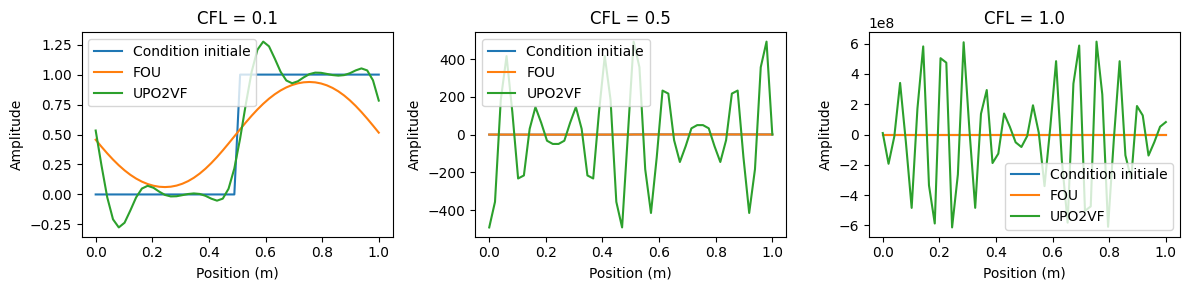

In [141]:
def euler_explicite(u, dt, du_dt_func, dx, a):
    return u + dt * du_dt_func(u, dx, a)

# Paramètres pour la CFL
CFLs = [0.1, 0.5, 1.0]

# Affichage
affichage_discretisation(CFLs, euler_explicite)

# 2 Schéma de Runge-Kutta explicite d’ordre deux

Rappel du schéma de Runge-Kutta explicite d’ordre deux :
$$
\begin{cases}
\delta U^\star = F(U^n) \\
\\
\delta U = \frac{1}{2}F(U^\star) + \frac{1}{2}F(U^n)
\end{cases}

\quad \text{avec} \quad
\begin{cases}
U^\star = U^n + \Delta t \delta U^\star\\
\\
U^{n+1} = U^n + \Delta t \delta U
\end{cases}
$$

1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma de Runge-Kutta explicite

2. Tester le programme sur les CFLs $0.1$, $0.5$ et $1$. Que peut-on observer avec les deux schémas ?


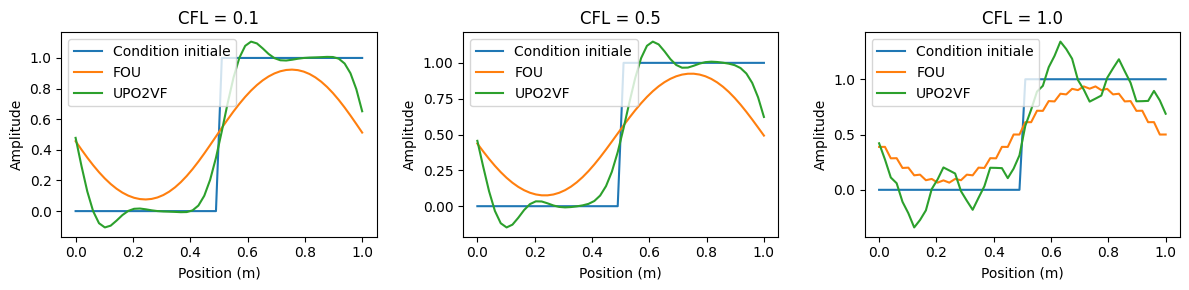

In [142]:
def runge_kutta_explicite(u, dt, du_dt_func, dx, a):
    # Première étape du RK2
    k1 = du_dt_func(u, dx, a)
    u_star = u + dt * k1
    
    # Deuxième étape du RK2
    k2 = du_dt_func(u_star, dx, a)
    u_new = u + dt * (0.5 * k1 + 0.5 * k2)
    
    return u_new

# Paramètres pour la CFL
CFLs = [0.1, 0.5, 1.0]

# Affichage
affichage_discretisation(CFLs, runge_kutta_explicite)

# 3 Schéma d'Euler implicite

Rappel du schéma d’Euler implicite :
$$
\delta U = F(U^{n+1}) \quad \text{avec} \quad U^{n+1} = U^n + \Delta t \delta U
$$

1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d’Euler implicite

2. Tester le programme sur les CFLs $0.1$, $0.5$, $1$, $10$ et $20$. Que peut-on observer avec les deux schémas ?

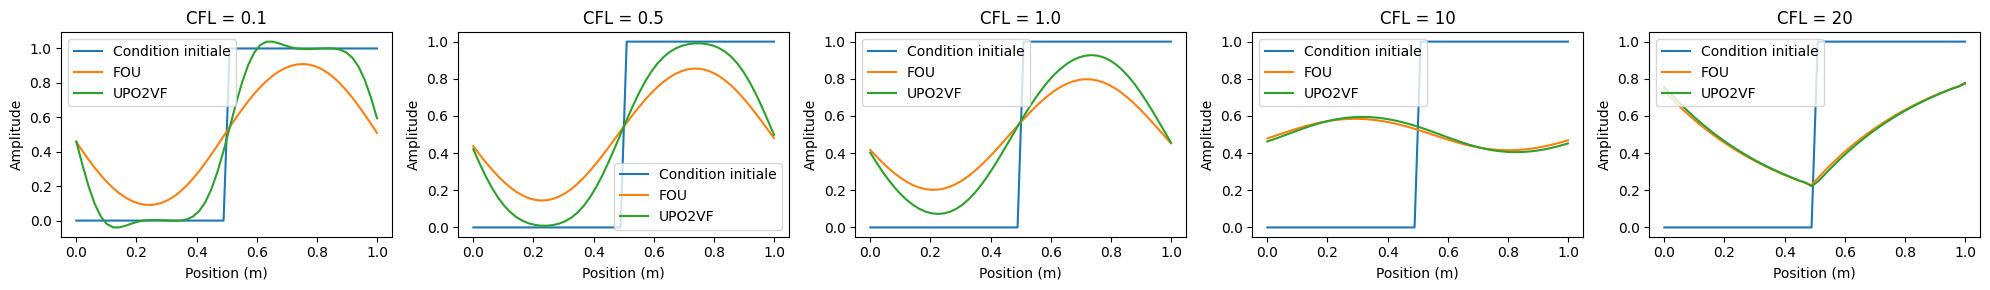

In [143]:
def euler_implicite(u, dt, du_dt_func, dx, a):
    u_new = fsolve(lambda u_new: u_new - u - dt * du_dt_func(u_new, dx, a), u)
    return u_new

# Paramètres pour la CFL
CFLs = [0.1, 0.5, 1.0, 10, 20]

# Affichage
affichage_discretisation(CFLs, euler_implicite)